In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#No 1

## Read and preview data

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/nba.csv')

In [3]:
# Preview the dataset
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


The last row seems to just contain null values

In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


We can see we have 9 columns and 458 rows. Some columns have missing values.
The columns are catergorical: and others are numerical

In [5]:
# Lets get the columns
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [6]:
# Lets describe our data
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


## Data cleaning

In [7]:
# We will change the columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')

In [11]:
# We shall check the number of unique values in each column
df.nunique()

,0
name,457
team,30
number,53
position,5
age,22
height,18
weight,87
college,118
salary,309


In [12]:
# Check for the missing values in each column
df.isna().sum()

,0
name,1
team,1
number,1
position,1
age,1
height,1
weight,1
college,85
salary,12


In [13]:
# We can check for the proportion of missing values
df.isna().mean()

,0
name,0.002183
team,0.002183
number,0.002183
position,0.002183
age,0.002183
height,0.002183
weight,0.002183
college,0.185590
salary,0.026201


The college column has ~18% null values. This is a significant proportion

In [14]:
# Lets get the rows which have missing data
df[df.isnull().any(axis=1)]

,name,team,number,position,age,height,weight,college,salary
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,6-7,208.0,NaN,1599840.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


- There is a row with missing values: index 457, which we shall remove.
- We shall impute missing values in the college column with 'No college' value to denote no college was provided.
- In the salary column, we shall leave the null values blank, for further analysis. But we shall mark this column

In [15]:
# Drop the row
df.dropna(axis= 0,how='all',inplace = True)
df

,name,team,number,position,age,height,weight,college,salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [16]:

# We can impute the college column with the 'No college' value
df['college'] = df['college'].fillna('No College')
df

,name,team,number,position,age,height,weight,college,salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2900000.0


In [17]:
# Lets check for missing values. We expect missing values only in the salary column
df.isnull().sum()

,0
name,0
team,0
number,0
position,0
age,0
height,0
weight,0
college,0
salary,11


In [18]:
# Lets check for duplicates
df.duplicated().value_counts()

,count
False,457


We do not have duplicates


Text(0.5, 1.0, 'NBA data boxplot')

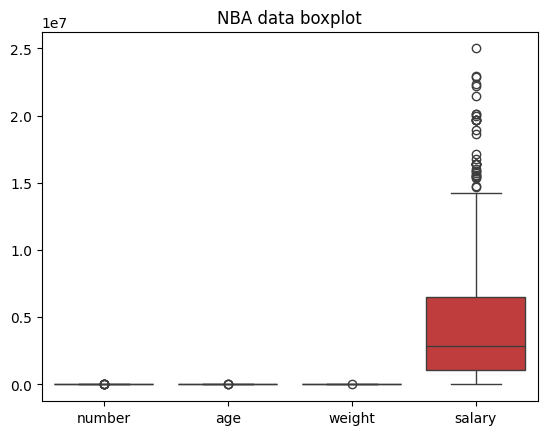

In [19]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
sns.boxplot(data=df)
plt.title('NBA data boxplot')

<Axes: >

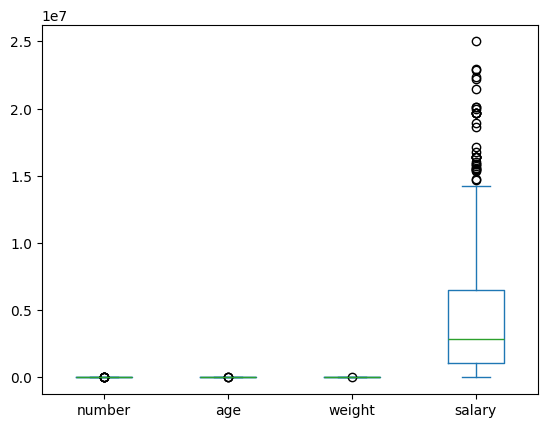

In [20]:
# Using matplotlib
df.plot(kind='box')

The salaries column contains many outliers. But given that this is a NBA dataset, we shall keep the ouliers, since they are representative of the real data.

Let us change the height column from feet to height in centimeters

In [21]:
# we shall split the height column and create new columns in feet and inches.
# The parameter expand = True allows us to split a text column into multiple columns
df[['feet','inch']] = df['height'].str.split('-',expand =True)

# Lets check our data
df

,name,team,number,position,age,height,weight,college,salary,feet,inch
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6,2
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,6,6
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,6,5
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,6,5
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0,6,10
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,6,10
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,6,3
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,900000.0,6,1
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2900000.0,7,3


In [22]:
# We check the datatypes to see if we convert datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      457 non-null    object 
 1   team      457 non-null    object 
 2   number    457 non-null    float64
 3   position  457 non-null    object 
 4   age       457 non-null    float64
 5   height    457 non-null    object 
 6   weight    457 non-null    float64
 7   college   457 non-null    object 
 8   salary    446 non-null    float64
 9   feet      457 non-null    object 
 10  inch      457 non-null    object 
dtypes: float64(4), object(7)
memory usage: 42.8+ KB


In [23]:
# Let us change the feet & inch columns to integers
df = df.astype({"inch":"int","feet":"int"})

In [24]:
# Now, we shall calculate height in centimeters by:
# 1 ft = 30.48cm  and 1 inch = 2.54 cm
df['height_cm'] = df['feet'] * 30.48 + df['inch']*2.54
df

,name,team,number,position,age,height,weight,college,salary,feet,inch,height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6,2,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,6,6,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,6,5,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,6,5,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0,6,10,208.28
...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,6,10,208.28
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,6,3,190.50
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,No College,900000.0,6,1,185.42
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,No College,2900000.0,7,3,220.98


<Axes: >

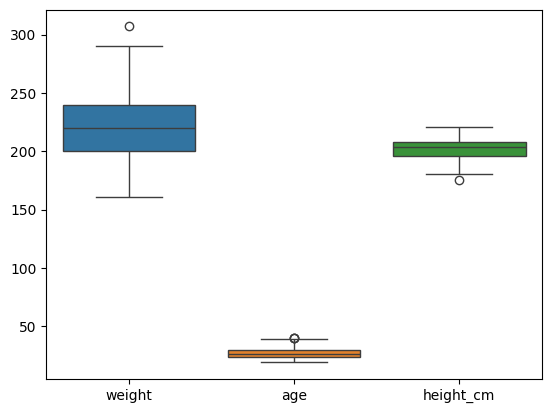

In [25]:
sns.boxplot(data = df[['weight','age','height_cm']])

In [26]:
df.head()

,name,team,number,position,age,height,weight,college,salary,feet,inch,height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,6,2,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,6,6,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,6,5,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,6,5,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,No College,5000000.0,6,10,208.28


In [27]:
df = df.drop(columns= ['height','inch'])

## Exploratory data analysis

###Univariate analysis

In [28]:
# We shall check the statistical summaries
df.describe()

# you can use include='all' parameter

,number,age,weight,salary,feet,height_cm
count,457.000000,457.000000,457.000000,4.460000e+02,457.000000,457.000000
mean,17.678337,26.938731,221.522976,4.842684e+06,6.080963,201.143545
std,15.966090,4.404016,26.368343,5.229238e+06,0.303504,8.718404
min,0.000000,19.000000,161.000000,3.088800e+04,5.000000,175.260000
25%,5.000000,24.000000,200.000000,1.044792e+06,6.000000,195.580000
50%,13.000000,26.000000,220.000000,2.839073e+06,6.000000,203.200000
75%,25.000000,30.000000,240.000000,6.500000e+06,6.000000,208.280000
max,99.000000,40.000000,307.000000,2.500000e+07,7.000000,220.980000


- The youngest nba player is 19 yrs while the oldest is 40yrs. The average age is ~27 years.
- The tallest nba player is 2.2 metres and the shortest is 175 cm. The average league's age is 201.14

In [33]:
# To calculate measures of central tendencies, we just use their functions
df['age'].mean()

26.938730853391686

In [34]:
# Median
df['age'].median()

26.0

In [35]:
 df['age'].mode()

,age
0,24.0


In [ ]:
# Use the standard deviation, variance and ,mode: std(), var() and mode()
# What can you see?

####Skewness and Kurtosis


**Skewness** is a statistical measure of asymmetric distribution of data
Skewness in statistics represents an imbalance of a normal distribution. This means that the data set has outliers or extreme values in its distribution.

In [37]:
df.skew()

TypeError: could not convert string to float: 'Avery Bradley'

In [ ]:
# We shall plot a plot with histograms

df.hist()
# plotting a line plot after changing it's width and height
plt.figure(figsize=(2, 2))

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [ ]:
df.kurt()

**value_counts()** function returns object containing counts of unique values.


In [38]:
# Lets now calculate how many of each unique values are in the columns
team = df['team'].value_counts()
team

,count
team,
New Orleans Pelicans,19
Memphis Grizzlies,18
New York Knicks,16
Milwaukee Bucks,16
Boston Celtics,15
Brooklyn Nets,15
Portland Trail Blazers,15
Oklahoma City Thunder,15
Denver Nuggets,15


<Axes: xlabel='team'>

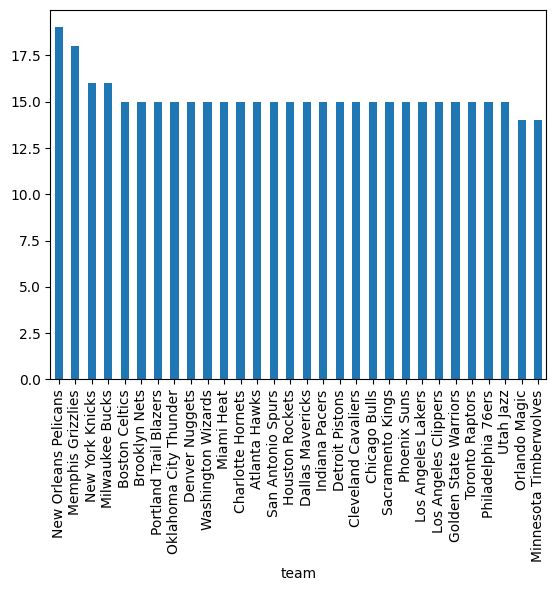

In [39]:
# Lets plot this
team.plot(kind='bar')

New Orleans Pelicans had the biggest roster with 19 players, while Memphis Grizzlies had 18. New York Knick and Milwaukee Bucks had 16 players. The rest had 15 while Orlando Magic and Minnesota Timberwolves was the thinnest with 14 players

Number

In [40]:
# We seek to check the most popular number
df['number'].value_counts().head(10)

,count
number,
5.0,23
3.0,21
0.0,20
1.0,20
8.0,19
12.0,17
11.0,17
4.0,17
9.0,16


Number 5, 3, 0, 1 and 8 are the most popular numbers,

In [41]:
df['number'].value_counts().tail(10)

,count
number,
16.0,2
77.0,2
54.0,1
92.0,1
39.0,1
45.0,1
99.0,1
37.0,1
52.0,1


The numbers [54,92,39,45,99,37,52,88] were worn only by 1 player each

Age

Text(0.5, 0, 'Age')

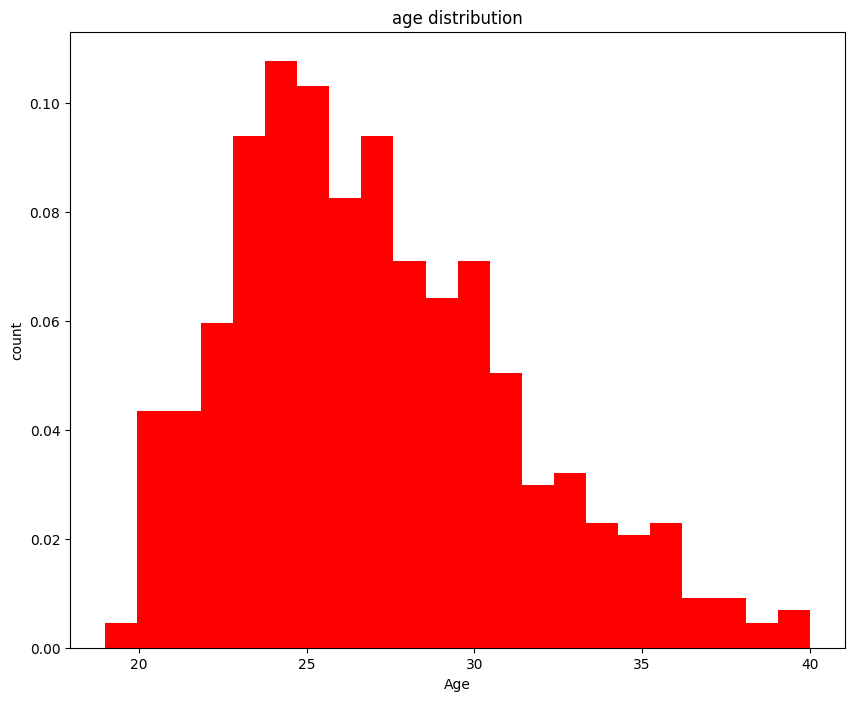

In [42]:
df['age'].hist(color = 'red',grid=False,figsize=(10,8),bins=df['age'].nunique(),density=True)
plt.title('age distribution')
plt.ylabel('count')
plt.xlabel('Age')

Text(0.5, 1.0, 'Age distribution')

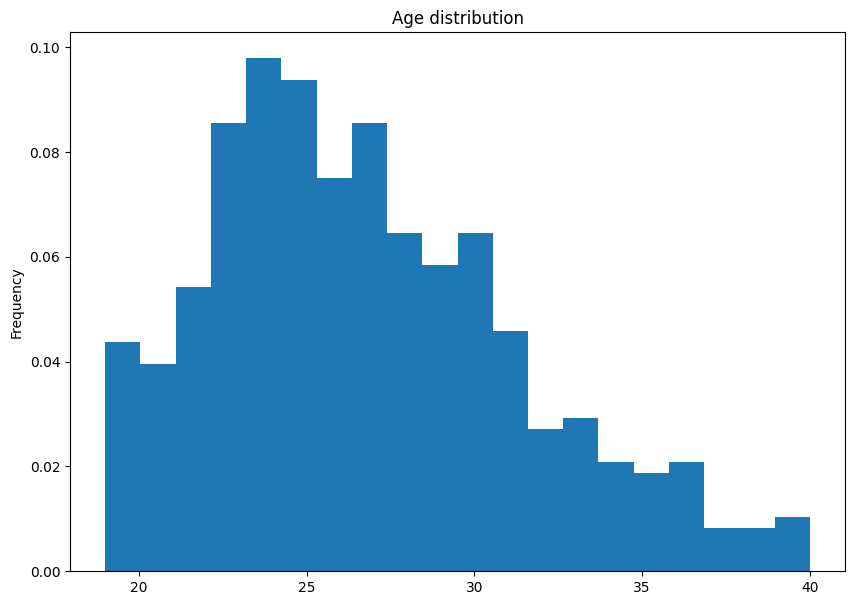

In [43]:
df['age'].plot(kind='hist',bins =20,density = True,figsize = (10,7))
plt.title('Age distribution')

Text(0.5, 1.0, 'Age histogram')

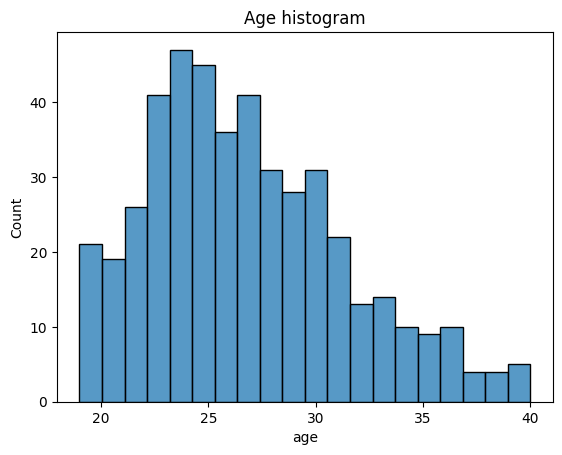

In [44]:
sns.histplot(df['age'],bins =20)
plt.title('Age histogram')

<Axes: ylabel='Frequency'>

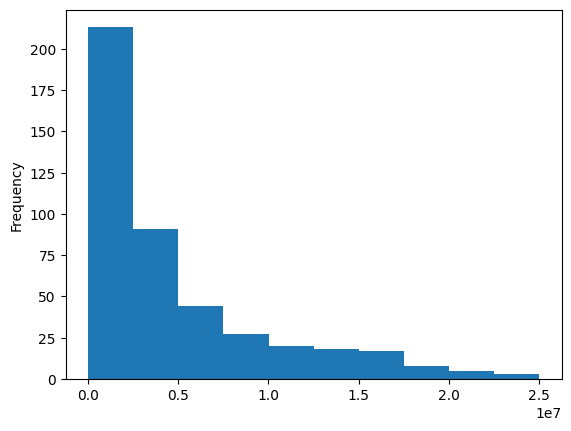

In [45]:
# Line graph
df['salary'].plot(kind='hist')

Position

In [46]:
# The number of players per position
df['position'].value_counts()

,count
position,
SG,102
PF,100
PG,92
SF,85
C,78


Text(0.5, 1.0, 'Number of plyares per position')

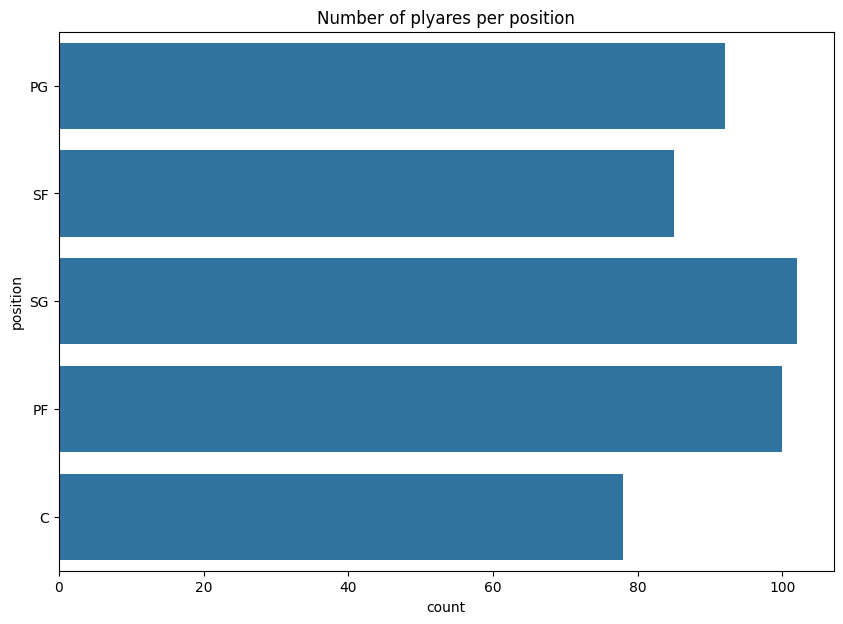

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(df['position'])
plt.title('Number of plyares per position')

Text(0.5, 1.0, 'position ')

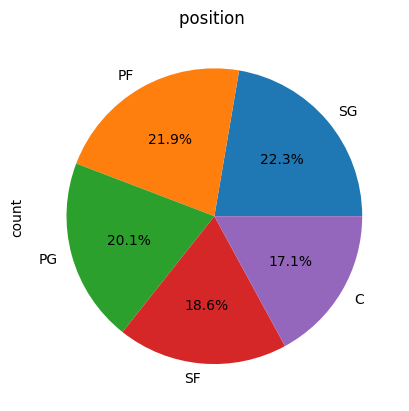

In [48]:
df['position'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('position ')

In [49]:
df

,name,team,number,position,age,weight,college,salary,feet,height_cm
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,6,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,6,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,6,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,6,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,No College,5000000.0,6,208.28
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,234.0,Kentucky,2239800.0,6,208.28
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,203.0,Butler,2433333.0,6,190.50
454,Raul Neto,Utah Jazz,25.0,PG,24.0,179.0,No College,900000.0,6,185.42
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,256.0,No College,2900000.0,7,220.98


<Axes: xlabel='height_cm', ylabel='weight'>

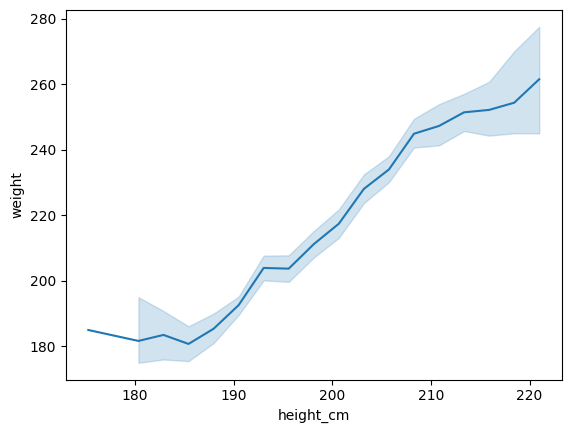

In [50]:
sns.lineplot(data=df,x=df['height_cm'],y=df['weight'])

In [53]:
pd.cross_tab(df['team','position'])

AttributeError: module 'pandas' has no attribute 'cross_tab'

## Bivariate analysis


**Correlation** is the statistical summary of the relationship between variables

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

In [51]:
df.corr()

ValueError: could not convert string to float: 'Avery Bradley'

**Correlation heatmaps** contain the same information in a visually appealing way. What more: they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(),annot=True, cmap='YlGn_r')

#
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['salary']].sort_values(by='salary', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Salary', fontdict={'fontsize':18}, pad=16);


###Crosstab
This method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [ ]:
df.nunique()

In [ ]:
pd.crosstab(df['position'],df['feet'])

Pivot tables

In [ ]:
x= pd.pivot_table(df.round({'salary':1}),index =['position'],columns=['feet'],
               values = ['salary'],aggfunc=[np.mean])

x# sns.heatmap(x)

**Graphs**




In [ ]:
# lets plot a line plot of salaries against the players ages
sns.lineplot(data=df,x=df['age'],y=df['salary'])
plt.title('AGe vs Salary')

In [ ]:
# lets plot a line plot of salaries against the players ages
sns.lineplot(data=df,x=df['number'],y=df['salary'])

In [ ]:
# lets plot a line plot of salaries against the player's heights
sns.lineplot(data=df,x=df['height_cm'],y=df['salary'])

In [ ]:
# lets plot a line plot of salaries against the players weights
sns.lineplot(data=df,x=df['weight'],y=df['salary'],cma)

# No. 2

In [ ]:
cali = pd.read_csv('/content/sample_data/california_housing_train.csv')
cali

In [ ]:

cali.columns

In [ ]:
cali.info()

In [ ]:
cali.duplicated().sum()

In [ ]:
cali[['total_bedrooms', 'population', 'households', 'median_income']].boxplot()
plt.figure(figsize=(10,8))

Eda

In [ ]:
cali.describe(include='all')

In [ ]:
cali['households'].mode()

In [ ]:
cali.()

In [ ]:
cali.plot(x=cali['total_rooms'],y = cali['total_bedrooms'],kind='scatter')